$Regression$


$Boston Housing  Pricing  and  Prediction$

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
import sys
print(sys.version)

1.22.3
1.3.4
1.0.1
3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]


Laoding the data set

In [3]:
df = pd.read_csv('data//housing.data', delim_whitespace = True, header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Exploratory Data Analysis

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.11.2


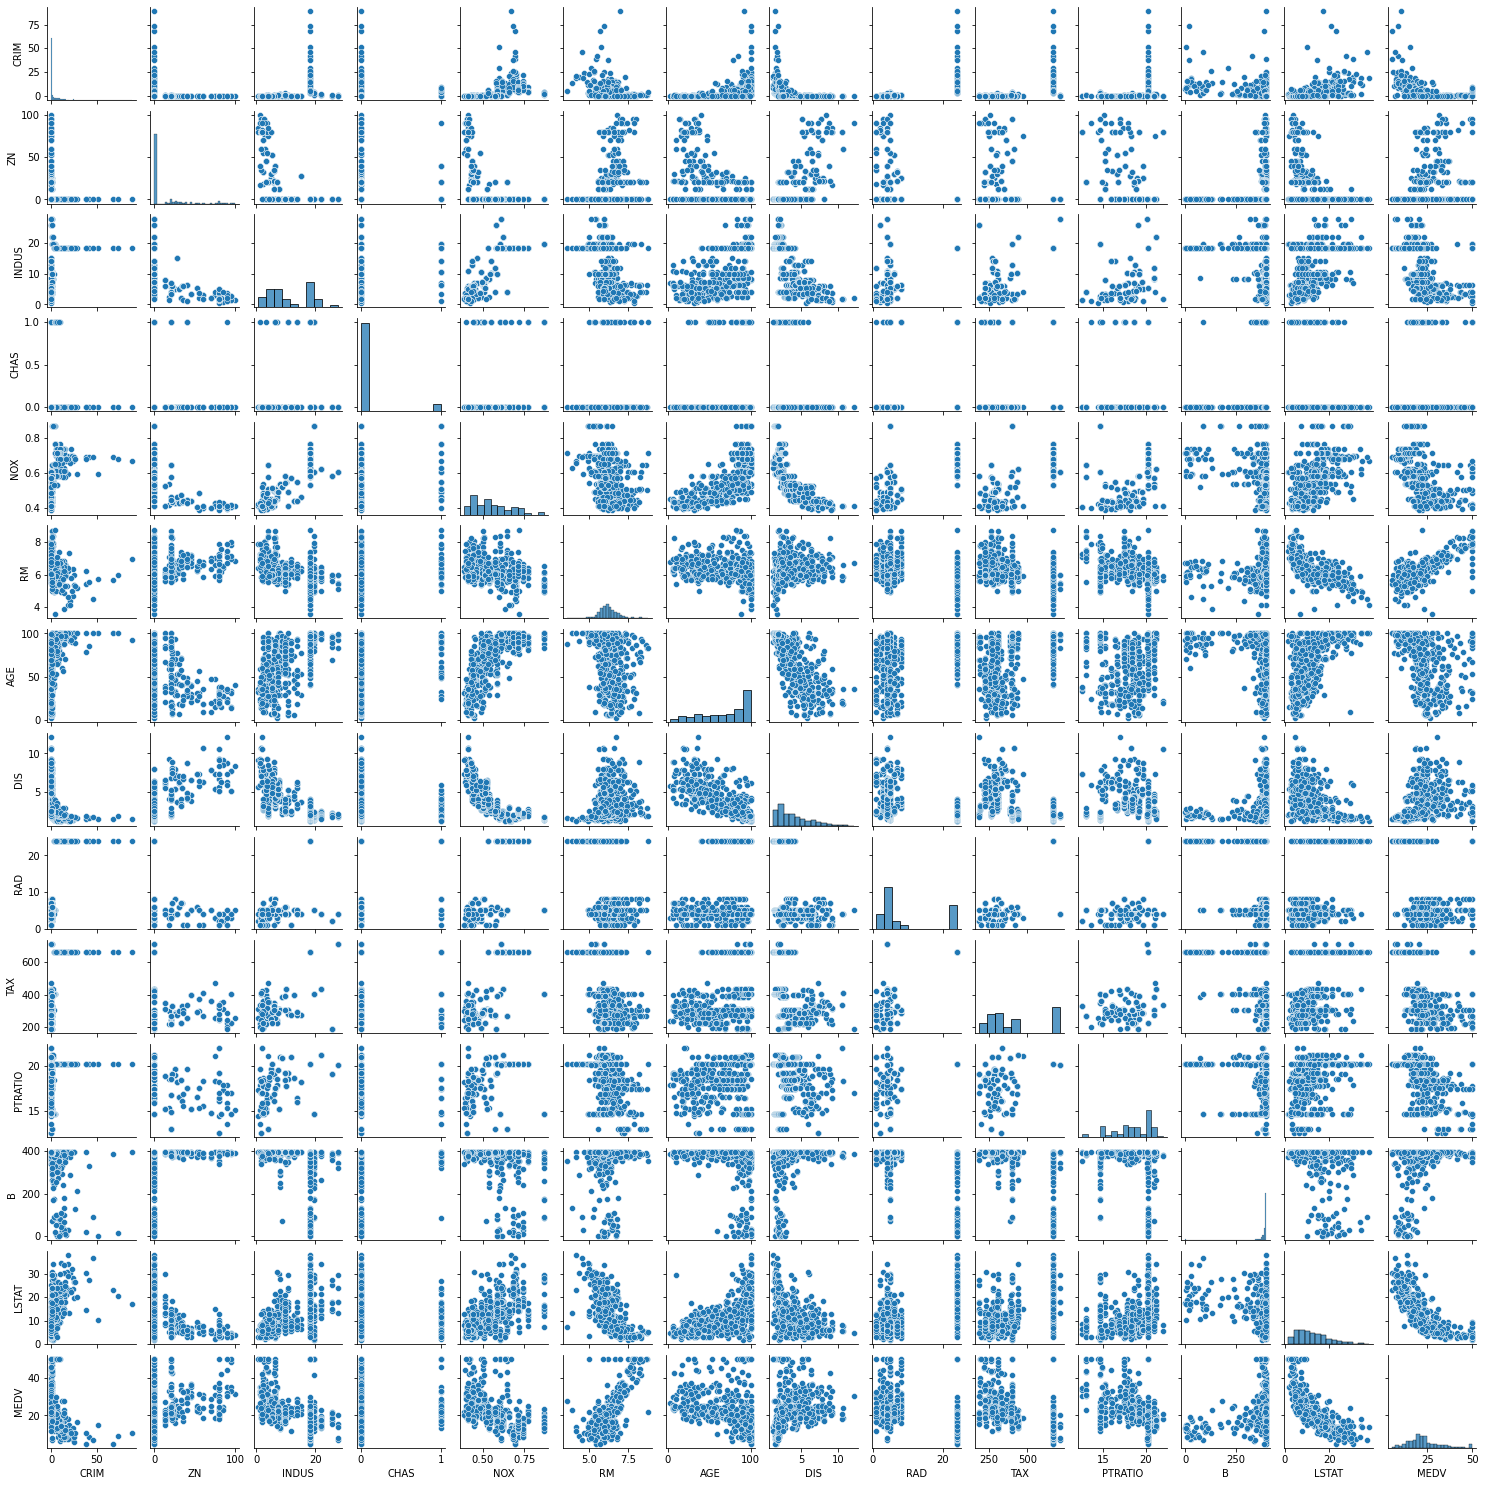

In [8]:
sns.pairplot(df, height = 1.5)

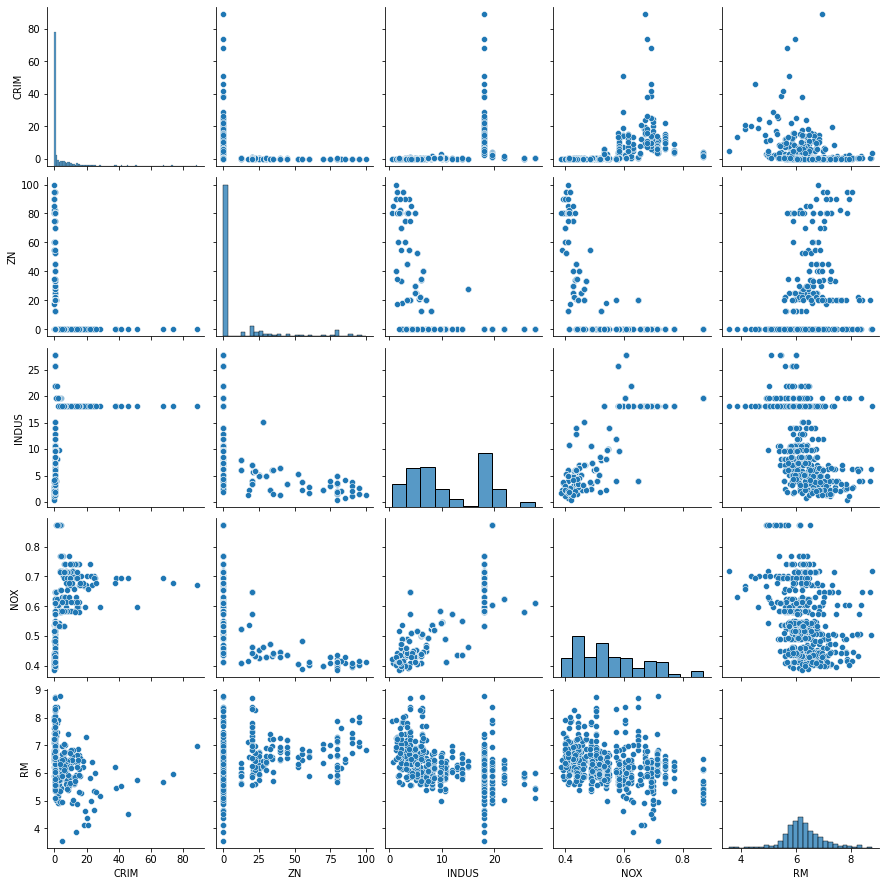

In [9]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']
sns.pairplot(df[col_study], height = 2.5)
plt.show()

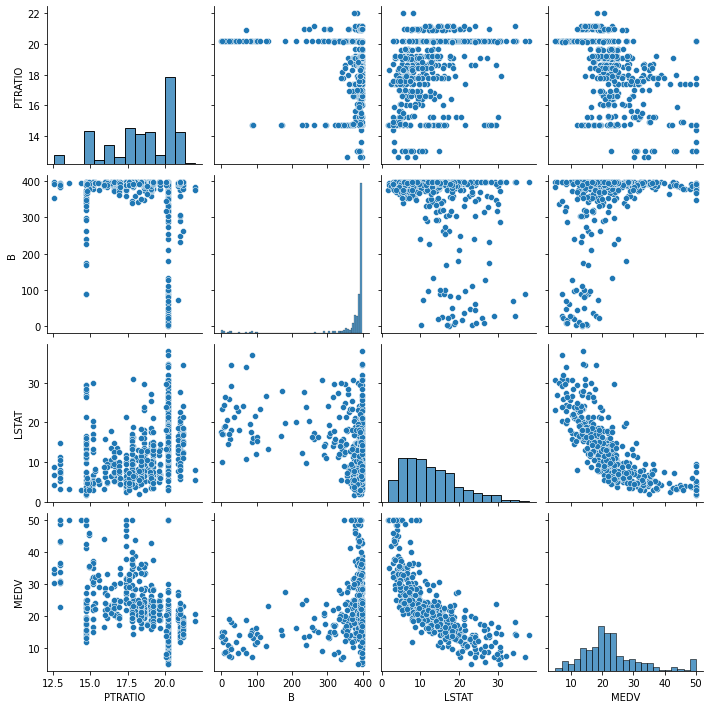

In [10]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[col_study], height=2.5);
plt.show()

Corelation Analysis and Feature Selection

In [11]:
pd.options.display.float_format = '{:,.3f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


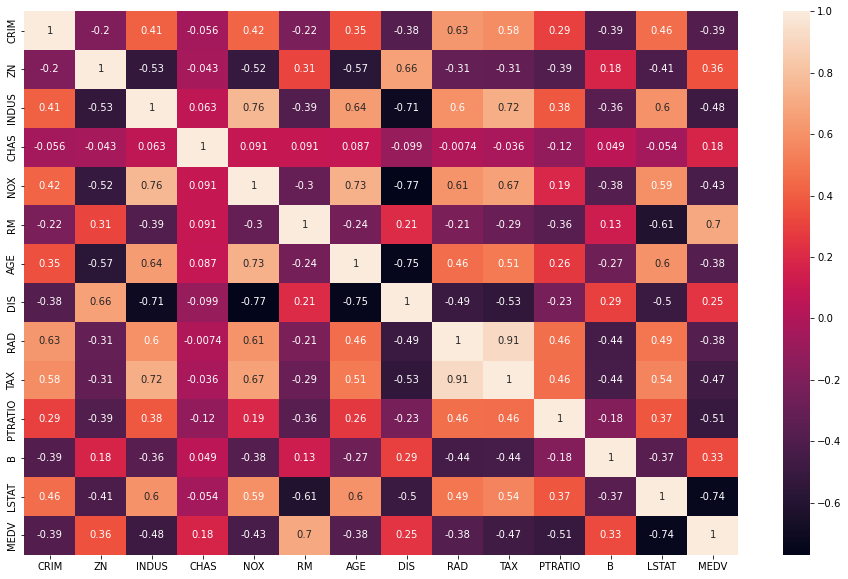

In [12]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

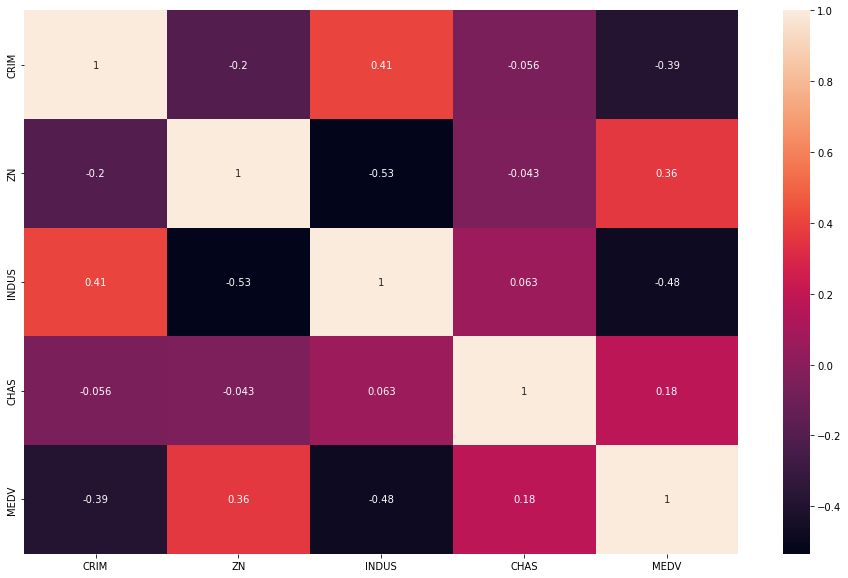

In [13]:
plt.figure(figsize = (16,10))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot = True)
plt.show()

Linear Regression with Scikit Learn

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [15]:
#parameter
X = df['RM'].values.reshape(-1, 1)

In [16]:
#target variable
y = df['MEDV'].values

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#instantiating the machine learning model into a single user defined variable
model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression()

In [20]:
model.coef_

array([9.10210898])

In [21]:
model.intercept_

-34.67062077643857

D:\jupiter\envs\udemy_ml_python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


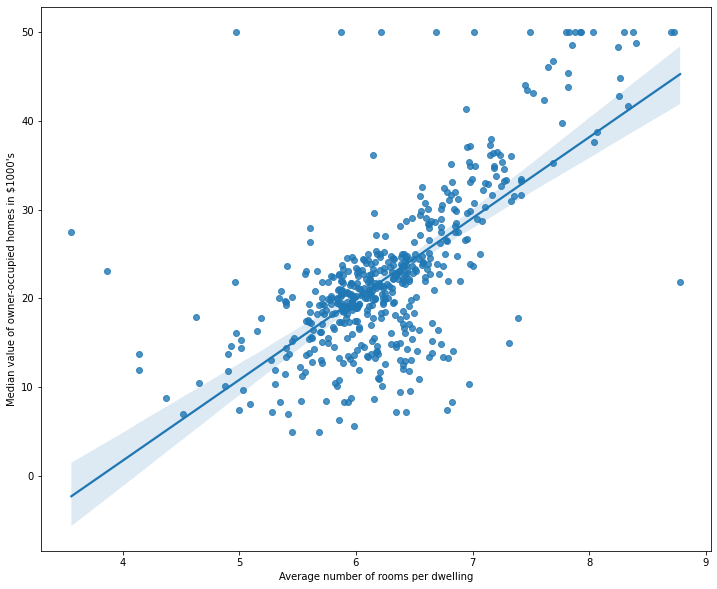

In [22]:
plt.figure(figsize = (12, 10))
sns.regplot(X, y)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

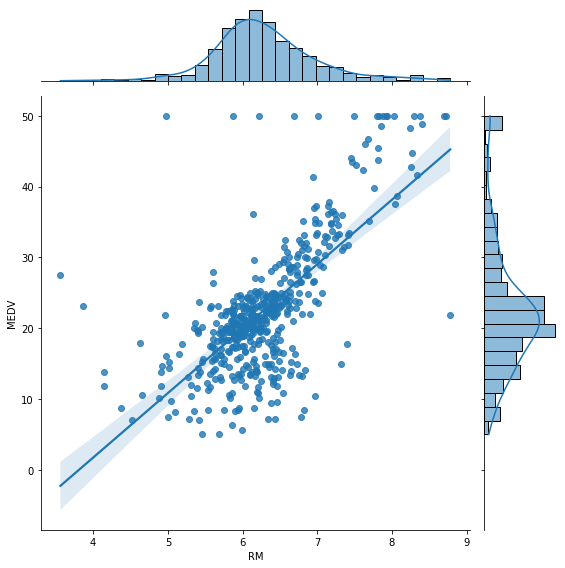

In [23]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [24]:
model.predict(np.array([7]).reshape(1, -1))

array([29.04414209])

Below is from Jacob T. VanderPlas text, Python Data Science Handbook: Essential Tools for Working with Data

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [25]:
#Step 1: Importing appropriate model  ----> already done
#Step 2: Instantiating
ml_2 = LinearRegression()
#Step 3: Arrange data into feature matrix and target vector
X = df['LSTAT'].values.reshape(-1, 1)
y = df['MEDV'].values
#Step 4: Fitting
ml_2.fit(X, y)
#Step 5: Predict
ml_2.predict(np.array([15]).reshape(1, -1))

array([20.30310057])

D:\jupiter\envs\udemy_ml_python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


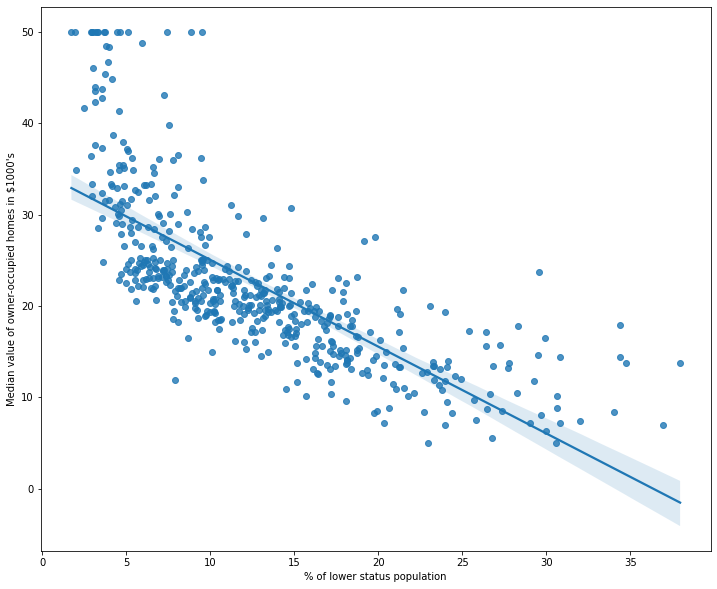

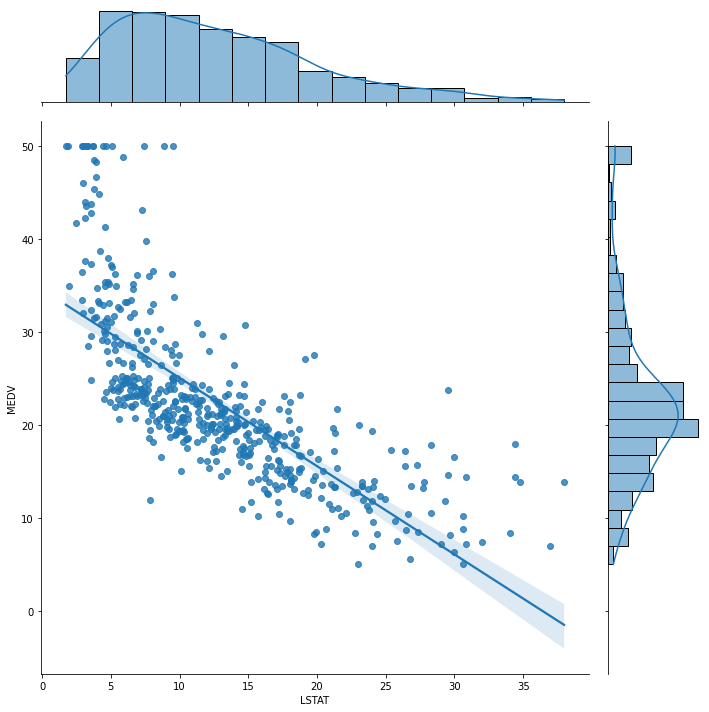

In [26]:
ml_2.fit(X, y)
plt.figure(figsize = (12, 10))
sns.regplot(X, y)
plt.xlabel("% of lower status population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

sns.jointplot(x = 'LSTAT', y = 'MEDV' , data = df, kind = 'reg', height = 10)
plt.show()

Robust Regression Using RANSAC algorithm

In [27]:
#Arrangine data into feature matrix and target variable
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values

In [28]:
#Importing appropriate model
from sklearn.linear_model import RANSACRegressor

In [29]:
#Instantiating the model
ransac = RANSACRegressor()
#Fitting the variables into the model
ransac.fit(X, y)

RANSACRegressor()

In [30]:
#Creating the inlier mask
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [31]:
line_X = np.arange(3, 10, 1)  #np.arange(3, 10, 1) gives the output as ([3, 4, 5, 6, 7, 8, 9])
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

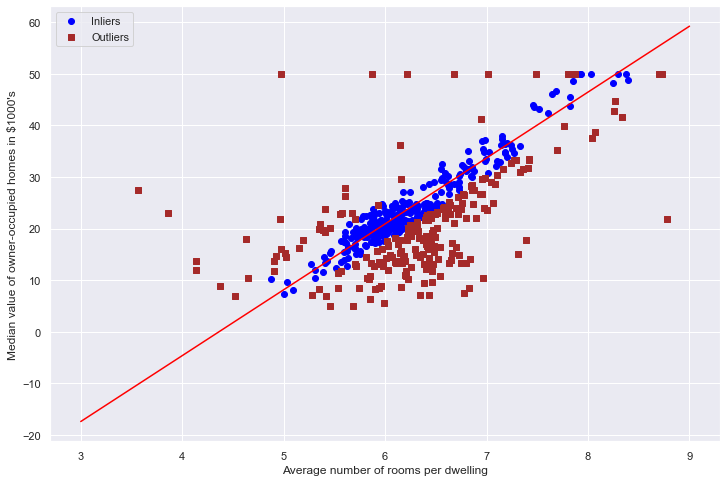

In [32]:
sns.set(style = 'darkgrid', context = 'notebook')
plt.figure(figsize = (12, 8))
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c = 'brown', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc = 'upper left')
plt.show()

In [33]:
print(ransac.estimator_.coef_)
print(ransac.estimator_.intercept_)

[12.76850221]
-55.703614494890566


In [34]:
#instantiating
ransac2 = RANSACRegressor()
#arranging the variables
X = df['LSTAT'].values.reshape(-1, 1)
y = df['MEDV'].values
#fitting
ransac2.fit(X, y)
#mask
inlier_mask = ransac2.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
#predtcting value range
line_X = np.arange(0, 40, 1)
line_y_ransac2 = ransac2.predict(line_X.reshape(-1, 1))

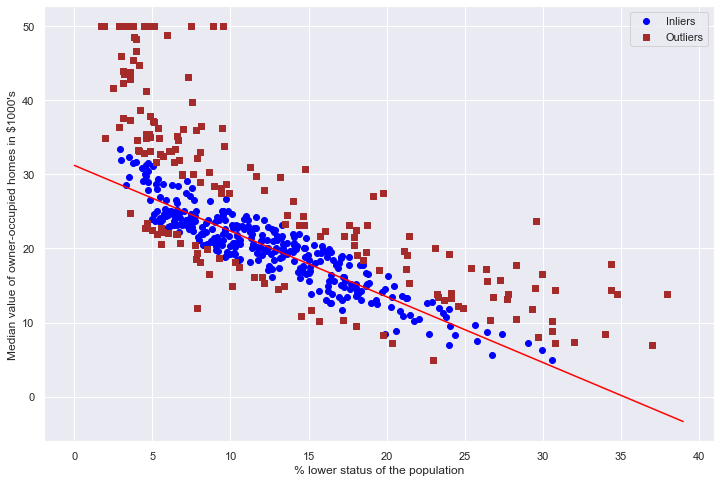

In [35]:
#plotting
sns.set(style = 'darkgrid', context = 'notebook')
plt.figure(figsize = (12, 8))
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c = 'brown', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac2, color = 'red')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc = 'upper right')
plt.show()

Performance Evaluation of Regression Model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#X contains all values except MEDV
X = df.iloc[:, :-1].values

In [38]:
y = df['MEDV'].values

In [39]:
#test_size defines how much of the data should be used for testing, here we use 20% of the data for testing
#random_state sets the seed, so everytime u run this code the training data set and testing data set do not change. 0, 1, 42 are commonly used random states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_train_pred = lr.predict(X_train)

In [43]:
y_test_pred = lr.predict(X_test)

We have 3 methods to evaluate our model
 1) Residual Analysis
 2) Mean Square Error
 3) Coefficient of Determination ,R^2

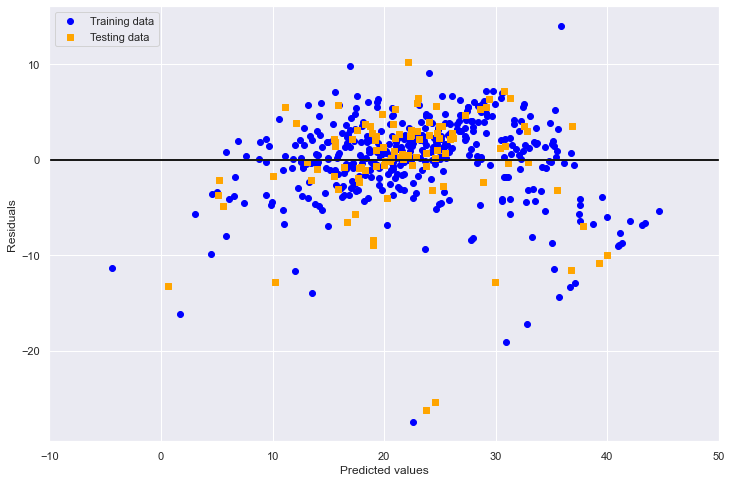

In [44]:
#METHOD 1 - Residual Analysis, used for visual inspection
plt.figure(figsize = (12, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = 's', label = 'Testing data')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
plt.xlim([-10, 50])
plt.show()

In [45]:
#Method 2 - Mean Square Error = 1/n(summation(from i = 1 to n)(yi - ycapi)^2)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

19.326470203585725
33.44897999767653


In [46]:
#Method 3 - Coefficient of Determination, R^2 = 1 - ((sum_of_squared_errors)/(total_sum_of_squares))        = 1 for the best model
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7730135569264234
0.5892223849182507


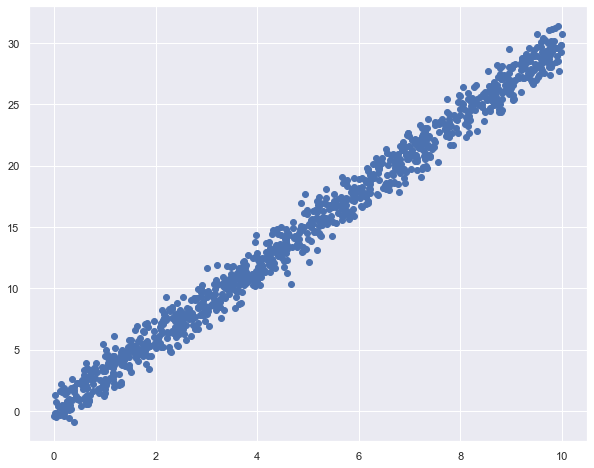

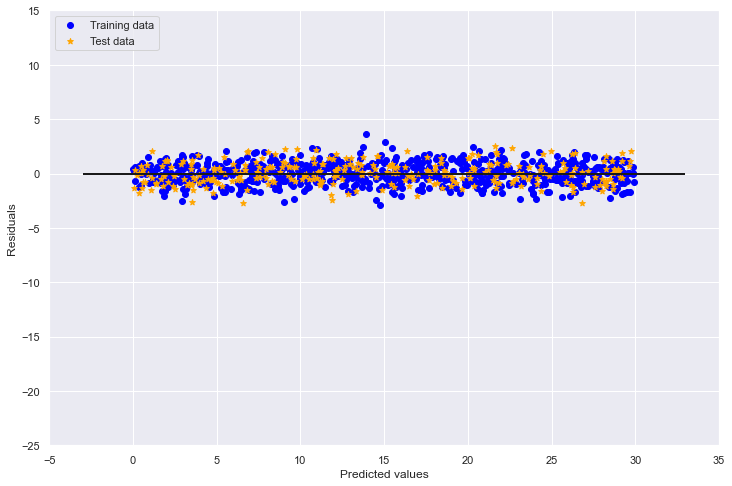

mean squared error for training set =  0.9619786445626687
mean squared error for testing set =  1.0269253952731352
R square for training set =  0.9873568371598913
R square for testing set =  0.986518441391199


In [47]:
#What a perfect model should look like

generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)                                   #random number choosen and multiplied with 10
y = 3 * x + np.random.randn(1000)                                     #random number choosen and multiplied with 3
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)

y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

#Residual Analysis
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

#Mean Squared Error
print("mean squared error for training set = ", mean_squared_error(y_train, y_train_pred))
print("mean squared error for testing set = ", mean_squared_error(y_test, y_test_pred))

#Coefficient of Determination
print("R square for training set = ", r2_score(y_train, y_train_pred))
print("R square for testing set = ", r2_score(y_test, y_test_pred))